## Importing Required Libraries

#### * Here We using BeautifulSoup Library 
#### * urllib Module


In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as ureq
import requests

#### Loading website

In [2]:
data = 'https://www.imdb.com/list/ls047954273/'

#### Applying urllib.request Module

In [3]:
data_tag = ureq(data)

#### Reading website data storing into a variable

In [4]:
page_html = data_tag.read()

In [5]:
data_tag.close()

#### passing "html.parser" to page_html and storing into a variable
#### And passing soup function from bs4

In [6]:
data_soup = soup(page_html,'html.parser')

In [7]:
data_soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls047954273?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Good Telugu Films 2010-2018 - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https:

#### storing "div" tag of class "lister-item-content" into "containters" variable which contain all the required data in given class

In [8]:
containers = data_soup.findAll("div", {"class" :"lister-item-content"})

#### storing "p" tag of class "text-muted text-small" into "containters2" variable which contain all the required data in given class

In [9]:
containers2 = data_soup.findAll("p", {"class" :"text-muted text-small"})

#### Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the html or Document

In [10]:
print(soup.prettify(containers[0]))

<div class="lister-item-content">
 <h3 class="lister-item-header">
  <span class="lister-item-index unbold text-primary">
   1.
  </span>
  <a href="/title/tt1582466/">
   Adhurs
  </a>
  <span class="lister-item-year text-muted unbold">
   (2010)
  </span>
 </h3>
 <p class="text-muted text-small">
  <span class="certificate">
   UA
  </span>
  <span class="ghost">
   |
  </span>
  <span class="runtime">
   150 min
  </span>
  <span class="ghost">
   |
  </span>
  <span class="genre">
   Action, Comedy, Thriller
  </span>
 </p>
 <div class="ipl-rating-widget">
  <div class="ipl-rating-star small">
   <span class="ipl-rating-star__star">
    <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
     <path d="M0 0h24v24H0z" fill="none">
     </path>
     <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z">
     </path>
     <path d="M0 0h24v24H0z" fill="none">
     <

#### storing containers data into container by indexing which help to extract data by tags and classes of html

In [11]:
container = containers[0]
len(containers)

100

#### Creating and Writing a csv file by filehandling 

In [12]:
filename = "Good_Telugu_Good_Films_2010-2018_by_imdbuser.csv"
f=open(filename,"w")

#### writing fileheaders for the file

In [13]:
headers = "Movie_Name,Certificate,Runtime,Genre,Rating,Votes,Year\n"
f.write(headers)

55

**Applying for loop on container of containers by passing "tags" along with respective "classes" in html
    to get Movie_name,Certificate,Movie_Runtime,Genre of movie,Rating of movie,votes to the movie***


In [14]:
for container in containers:
    

    
    ##################***Movie_Name***###########################
    
    Moviename = container.findAll({"a":"href"})
    if (len(Moviename) > 0):
        Movie_Name = Moviename[0].text.strip()
        #print(Movie_Name)
    
    
    ##################***Movie_Name***###########################
    
    '''Movie_name_container = container.findAll("h3",{"class":"lister-item-header"})
    #if (len(Movie_name_container) > 0):
        #MovieName = Movie_name_container[0].text
    
        #trim_moviename = ' '.join(MovieName.split())
    
        
        #mvnm = trim_moviename.split(" ")
        #mvnm.pop(-1)
        #mvnm.pop(0)
        #Movie_Name = ' '.join(mvnm)
        #print (movie)'''
    
    ##################***Certificate***###########################
    
    Certificate_container = container.findAll("span",{"class":"certificate"})
    if (len(Certificate_container) > 0):
        Certificate = Certificate_container[0].text.strip()
    
    ##################***Runtime***###########################
    
    Runtime_container = container.findAll("span",{"class":"runtime"})
    if (len(Runtime_container) > 0):
        runtime = Runtime_container[0].text.strip()
        trim_Runtime = ' '.join(runtime.split(" "))
        rntm = trim_Runtime.split(" ")
        rntm.pop(-1)
        Runtime = ' '.join(rntm)
        
    ##################***Genre***###########################
    
    Genre_container = container.findAll("span",{"class":"genre"})
    if (len(Genre_container) > 0):
        Genre = Genre_container[0].text.strip()#.split(" ")
    
    ##################***Rating***###########################
    
    Rating_container = container.findAll("span",{"class":"ipl-rating-star__rating"})
    if (len(Rating_container) > 0):
        Rating = Rating_container[0].text.strip()#.split(" ")
   
    ##################***Votes***###########################
    
    Votes_container = container.findAll("span",{"name": "nv"})
    if (len(Votes_container) > 0):
        Votes = Votes_container[0].text.strip()#.split(" ")
        
    
    ##################***Year***########################

    year_container = container.findAll("h3",{"class":"lister-item-header"})
    if (len(year_container) > 0):
        Yr = year_container[0].text
    
        trim_yr = ' '.join(Yr.split())
        yr = trim_yr.split(" ")
        del yr[:-1]
        Year = ' '.join(yr)
        
        
        
        
    
    
    
    
    
    #print(Movie_Name + "," + Certificate + "," + Runtime + "," + Genre.replace(",", "|") + "," + Rating + "," +  Votes.replace(",", "")+","+Year.replace("(", " ") + "\n")
    
    #storing all the values into csv file by using f.write function
    f.write(Movie_Name + "," + Certificate + "," + Runtime + "," + Genre.replace(",", "|") + "," + Rating + "," +  Votes.replace(",", "") + "," +Year.replace("(", " ")+"\n")
f.close()    
#closing file
    


#### Creating another csv file to get Director names 

In [15]:
filename = "Good_Telugu_Good_Films_2010-2018_by_imdbuser_Directorsother.csv"
f=open(filename,"w")

#### Passing header to the file

In [16]:
headers = "Director,lead_actor,Supporting_lead_actor,Actor_1,Actor_2\n"
f.write(headers)

58

**Applying for loop on container of containers by passing "tags" along with respective "classes" in html to get Director**

In [17]:
for container2 in containers2:
    
    #################### Director ############################
    dir = container2.findAll({"a":"href"})
    if (len(dir) > 0):
        Director = dir[0].text.strip()
        
    ##################### lead_actor ###########################
    
    la = container2.findAll({"a":"href"})
    if (len(la) > 0):
        Lead = la[1].text.strip()
    ##################### Supporting_lead_actor  ################
    
    SLA = container2.findAll({"a":"href"})
    if (len(SLA) > 0):
        Supporting_lead_actor = SLA[2].text.strip()
    #################### Actor_1 ################################
    
    Ac_1 = container2.findAll({"a":"href"})
    if (len(Ac_1) > 0):
        Actor_1 = Ac_1[3].text.strip()
    
    
    #################### Actor_2 ################################
    
    Ac_2 = container2.findAll({"a":"href"})
    #print("Length of index is ",len(Ac_2))
    if (len(Ac_2) >= 5 ) :
        Actor_2 = Ac_2[4].text.strip()
        
    
        
       # print(Director + "," + Lead + "," + Supporting_lead_actor + "," + Actor_1 + "," + Actor_2 +"\n")
        
        f.write(Director + "," + Lead + "," + Supporting_lead_actor + "," + Actor_1 + "," + Actor_2 +"\n")
f.close()


In [18]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\other\\Class works\\Web scaping project Rakesh Pippala'

**importing pandas library ,library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series**

**loading Datasets which Extracted above**


In [19]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Hp\Desktop\other\Class works\Web scaping project Rakesh Pippala\Good_Telugu_Good_Films_2010-2018_by_imdbuser.csv')
df1 = pd.read_csv(r'C:\Users\Hp\Desktop\other\Class works\Web scaping project Rakesh Pippala\Good_Telugu_Good_Films_2010-2018_by_imdbuser_Directorsother.csv')

**< Dataframe_name >.head()" function used to display 1st few rows from DataFrame**

In [20]:
df.head()

,Movie_Name,Certificate,Runtime,Genre,Rating,Votes,Year
0,Adhurs,UA,150,Action| Comedy| Thriller,6.8,2097,2010)
1,Leader,UA,167,Drama,8.0,3678,2010)
2,Prasthanam,UA,153,Action| Drama,8.3,2284,2010)
3,Darling,UA,151,Comedy| Drama| Romance,7.3,2367,2010)
4,Vedam,A,135,Action| Drama,8.1,6186,2010)


In [21]:
df1.head()

,Director,lead_actor,Supporting_lead_actor,Actor_1,Actor_2
0,Vinayak V.V.,N.T. Rama Rao Jr.,Nayanthara,Sheela Kaur,Ananth
1,Sekhar Kammula,Rana Daggubati,Richa Gangopadhyay,Priya Anand,Joy Badlani
2,Deva Katta,Rashmi Gautam,Jeeva,Sundeep Kishan,Vennela Kishore
3,A. Karunakaran,Prabhas,Kajal Aggarwal,Shradha Das,Prabhu
4,Radha Krishna Jagarlamudi,Manoj Kumar Manchu,Allu Arjun,Anushka Shetty,Manoj Bajpayee


**"< dataframename >.shape" used to get shape of DataFrame**

In [22]:
df.shape

(100, 7)

In [23]:
df1.shape

(97, 5)

**To drop the column name** <br>
 **< DataFrame_name>.drop(['< column_name >'])**<br>
**axis=1 -->     : for droping 'column'<br>
axis=0  -->      : for droping 'row'<br>
"inplace = True" : to save the changes in Dataframe**<br>

**< DataFrame_name >.columns** <br>
**to know the columns**

In [24]:
df1.columns

Index(['Director', 'lead_actor', 'Supporting_lead_actor', 'Actor_1',
       'Actor_2'],
      dtype='object')

**To add to different csv files Use "concat"** <br>
**pd.concat([Dataframe_name_1, Dataframe_name_1],axis = 1)**

In [25]:
cdf = pd.concat([df,df1],axis = 1)

In [26]:
cdf.head()

,Movie_Name,Certificate,Runtime,Genre,Rating,Votes,Year,Director,lead_actor,Supporting_lead_actor,Actor_1,Actor_2
0,Adhurs,UA,150,Action| Comedy| Thriller,6.8,2097,2010),Vinayak V.V.,N.T. Rama Rao Jr.,Nayanthara,Sheela Kaur,Ananth
1,Leader,UA,167,Drama,8.0,3678,2010),Sekhar Kammula,Rana Daggubati,Richa Gangopadhyay,Priya Anand,Joy Badlani
2,Prasthanam,UA,153,Action| Drama,8.3,2284,2010),Deva Katta,Rashmi Gautam,Jeeva,Sundeep Kishan,Vennela Kishore
3,Darling,UA,151,Comedy| Drama| Romance,7.3,2367,2010),A. Karunakaran,Prabhas,Kajal Aggarwal,Shradha Das,Prabhu
4,Vedam,A,135,Action| Drama,8.1,6186,2010),Radha Krishna Jagarlamudi,Manoj Kumar Manchu,Allu Arjun,Anushka Shetty,Manoj Bajpayee


**Cheching my working Directory**

In [27]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\other\\Class works\\Web scaping project Rakesh Pippala'

**Exporting CSV file**<br>
**DataFrame_name.to_csv('Dataframe_name which we want to give')**

In [28]:
cdf.to_csv('Good_Telugu_Films_2010_2018_by_imdb.csv')

In [29]:
df3 = pd.read_csv(r'C:\Users\Hp\Desktop\other\Class works\Web scaping project Rakesh Pippala\Good_Telugu_Films_2010_2018_by_imdb.csv')

In [30]:
df3.head()

,Unnamed: 0,Movie_Name,Certificate,Runtime,Genre,Rating,Votes,Year,Director,lead_actor,Supporting_lead_actor,Actor_1,Actor_2
0,0,Adhurs,UA,150,Action| Comedy| Thriller,6.8,2097,2010),Vinayak V.V.,N.T. Rama Rao Jr.,Nayanthara,Sheela Kaur,Ananth
1,1,Leader,UA,167,Drama,8.0,3678,2010),Sekhar Kammula,Rana Daggubati,Richa Gangopadhyay,Priya Anand,Joy Badlani
2,2,Prasthanam,UA,153,Action| Drama,8.3,2284,2010),Deva Katta,Rashmi Gautam,Jeeva,Sundeep Kishan,Vennela Kishore
3,3,Darling,UA,151,Comedy| Drama| Romance,7.3,2367,2010),A. Karunakaran,Prabhas,Kajal Aggarwal,Shradha Das,Prabhu
4,4,Vedam,A,135,Action| Drama,8.1,6186,2010),Radha Krishna Jagarlamudi,Manoj Kumar Manchu,Allu Arjun,Anushka Shetty,Manoj Bajpayee


**Droping column**

In [31]:
df3.drop(['Unnamed: 0'], axis=1,inplace = True)

**Changing particular Elements in particular Column or Columns **<br>
Dataframe_name.replace({'column_name':{'element which want to change' : 'replacing value'}})**

In [32]:
df3.replace({'Certificate': {'A': 'NR'}},inplace= True)

### Exporting my final CSV file

#### Checking null values in data frame

In [33]:
df3.isnull().sum()

Movie_Name               0
Certificate              0
Runtime                  0
Genre                    0
Rating                   0
Votes                    0
Year                     0
Director                 3
lead_actor               3
Supporting_lead_actor    3
Actor_1                  3
Actor_2                  3
dtype: int64

In [34]:
df3['Year']=df3['Year'].str.replace(")","") 

In [35]:
new = df3["Genre"].str.split(" ", n = 2, expand = True)

In [36]:
new.head(2)

,0,1,2
0,Action|,Comedy|,Thriller
1,Drama,None,None


In [37]:
df3["Genre1"]= new[0] 
df3["Genre2"]= new[1]
df3["Genre3"]= new[2]

In [38]:
df3['Genre1']=df3['Genre1'].str.replace("|","") 
df3['Genre2']=df3['Genre2'].str.replace("|","") 


In [39]:
df3.drop('Genre',axis=1,inplace=True)

In [40]:
df3.head(50)

,Movie_Name,Certificate,Runtime,Rating,Votes,Year,Director,lead_actor,Supporting_lead_actor,Actor_1,Actor_2,Genre1,Genre2,Genre3
0,Adhurs,UA,150,6.8,2097,2010,Vinayak V.V.,N.T. Rama Rao Jr.,Nayanthara,Sheela Kaur,Ananth,Action,Comedy,Thriller
1,Leader,UA,167,8.0,3678,2010,Sekhar Kammula,Rana Daggubati,Richa Gangopadhyay,Priya Anand,Joy Badlani,Drama,None,None
2,Prasthanam,UA,153,8.3,2284,2010,Deva Katta,Rashmi Gautam,Jeeva,Sundeep Kishan,Vennela Kishore,Action,Drama,None
3,Darling,UA,151,7.3,2367,2010,A. Karunakaran,Prabhas,Kajal Aggarwal,Shradha Das,Prabhu,Comedy,Drama,Romance
4,Vedam,NR,135,8.1,6186,2010,Radha Krishna Jagarlamudi,Manoj Kumar Manchu,Allu Arjun,Anushka Shetty,Manoj Bajpayee,Action,Drama,None
5,Golimar,NR,160,5.9,409,2010,Puri Jagannadh,Tottempudi Gopichand,Priyamani,Roja,Nassar,Action,None,None
6,Sneha Geetham,NR,160,6.2,48,2010,Madhura Sreedhar,Shreya Dhanwanthary,Vennela Kishore,Venu Madhav,Sundeep Kishan,Drama,None,None
7,Maryada Ramanna,U,125,7.4,2250,2010,S.S. Rajamouli,Suneel,Saloni Aswani,Nagineedu,Brahmaji,Action,Comedy,None
8,Khaleja,UA,170,7.5,7697,2010,Trivikram Srinivas,Mahesh Babu,Anushka Shetty,Prakash Raj,Brahmanandam,Action,Drama,None
9,Brindaavanam,UA,169,7.1,3390,2010,Vamshi Paidipally,N.T. Rama Rao Jr.,Kajal Aggarwal,Samantha Ruth Prabhu,Prakash Raj,Action,Comedy,Drama


In [41]:
a=df3.Rating
def fun(a):
  
    if (a>=8): 
        return 'entertainable'
  
    elif (a>=5) and (a<8): 
        return 'Watchable'
  
    elif(a>3)and(a<5): 
        return 'Average'
    
    
df3['Attention']=a.apply(fun)

In [42]:
df3.head()

,Movie_Name,Certificate,Runtime,Rating,Votes,Year,Director,lead_actor,Supporting_lead_actor,Actor_1,Actor_2,Genre1,Genre2,Genre3,Attention
0,Adhurs,UA,150,6.8,2097,2010,Vinayak V.V.,N.T. Rama Rao Jr.,Nayanthara,Sheela Kaur,Ananth,Action,Comedy,Thriller,Watchable
1,Leader,UA,167,8.0,3678,2010,Sekhar Kammula,Rana Daggubati,Richa Gangopadhyay,Priya Anand,Joy Badlani,Drama,None,None,entertainable
2,Prasthanam,UA,153,8.3,2284,2010,Deva Katta,Rashmi Gautam,Jeeva,Sundeep Kishan,Vennela Kishore,Action,Drama,None,entertainable
3,Darling,UA,151,7.3,2367,2010,A. Karunakaran,Prabhas,Kajal Aggarwal,Shradha Das,Prabhu,Comedy,Drama,Romance,Watchable
4,Vedam,NR,135,8.1,6186,2010,Radha Krishna Jagarlamudi,Manoj Kumar Manchu,Allu Arjun,Anushka Shetty,Manoj Bajpayee,Action,Drama,None,entertainable


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

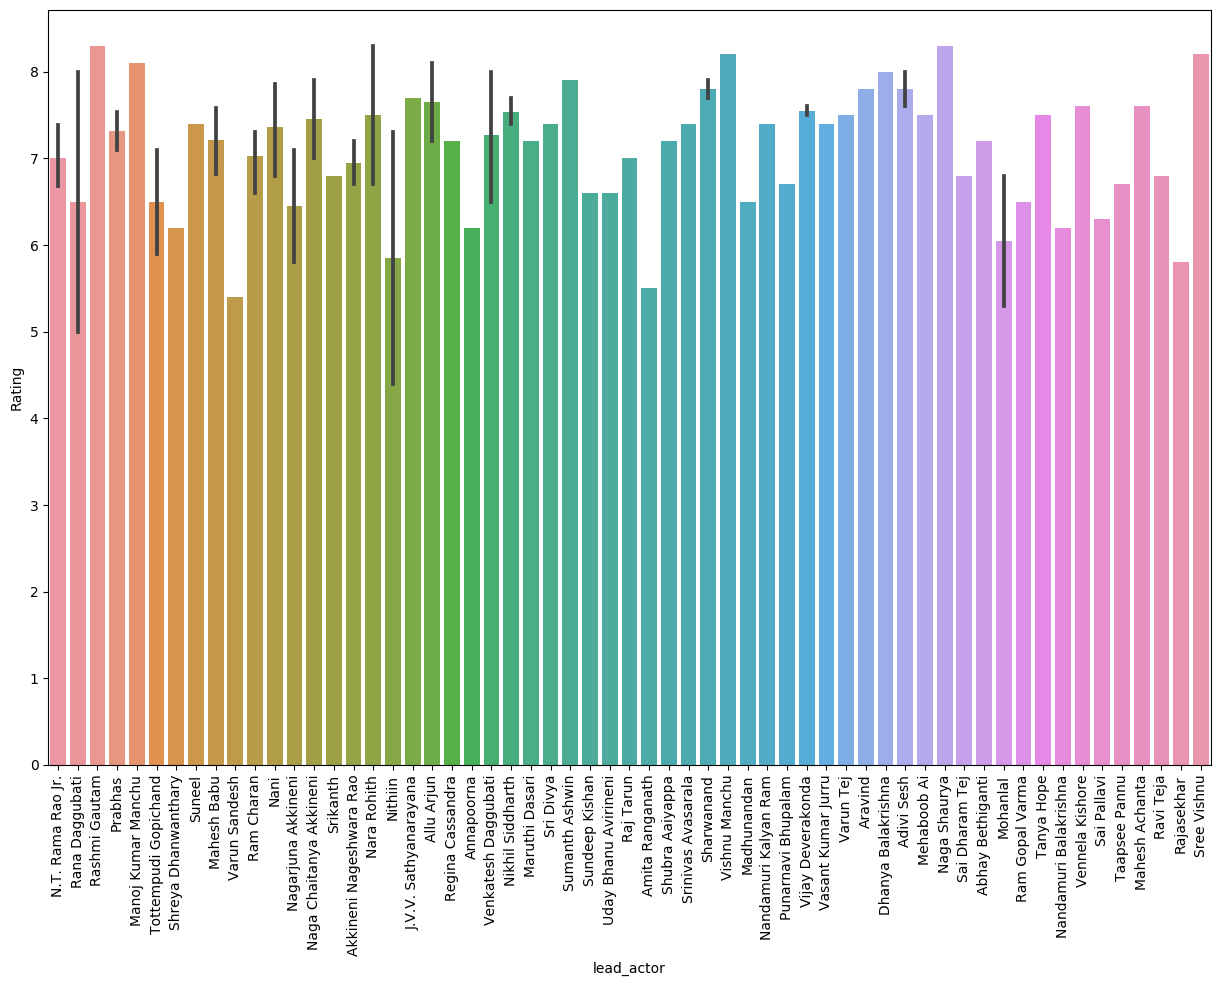

In [55]:
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(df3.lead_actor,df3.Rating);
plt.xticks(rotation=90);